# Scalar Example 1

## Parameter Initialization: 

In [1]:
using Ipopt, JuMP, LinearAlgebra, PyPlot, Statistics

Kf = 60

Q₁ = 0.11112
Q₂ = 0.25806

R₁ = 0.40872
R₂ = 0.5949

A = 1.0947
B₁ = 0.1254
B₂ = 0.045934

C = [Q₁*B₁ ; Q₂*B₂]

Mbr = [(Q₁*B₁^2 + R₁) Q₁*B₁*B₂; Q₂*B₁*B₂ (Q₂*B₂^2 + R₂)]

Mj = [(Q₁*B₁^2 + R₁) 0; 0 (Q₂*B₂^2 + R₂)]

Mgs = [(Q₁*B₁^2 + R₁) 0; Q₂*B₁*B₂ (Q₂*B₂^2 + R₂)]

Nj = [0 Q₁*B₁*B₂; Q₂*B₁*B₂ 0]

Ngs = [0 Q₁*B₁*B₂; 0 0]

Lbr = - inv(Mbr)*C

Kbr = Lbr*A

Lj = - inv(Mj)*C

Kj = Lj*A

Lgs = - inv(Mgs)*C

Kgs = Lgs*A

x_init = 1 
x_ref = 0;

## Convergence Conditions:

In [2]:
A_br = A + B₁*Kbr[1] + B₂*Kbr[2]

A_jac = A + B₁*Kj[1] + B₂*Kj[2]

A_gs = A + B₁*Kgs[1] + B₂*Kgs[2]

# Convergence Condition: Best Response
SR_br = maximum(abs.(eigvals(A_br)))

if SR_br <= 1
    br_check = true
else
    br_check = false
end

# Convergence Condition: Jacobi
SR_jac = maximum(abs.(eigvals(A_jac)))

if SR_jac <= 1
    jac_check = true
else
    jac_check = false
end

# Convergence Condition: Gauss-Seidel
SR_gs = maximum(abs.(eigvals(A_gs))) 

if SR_gs <= 1
    gs_check = true
else
    gs_check = false
end

println("Best Response:")
println("Convergence check is ", br_check)
println("ρ(Abr) = ", round(SR_br, digits=6), "\n")

println("Jacobi Game:")
println("Convergence check is ", jac_check)
println("ρ(Aj) = ", round(SR_jac, digits=6), "\n")

println("Gauss-Seidel Game:")
println("Convergence check is ", gs_check)
println("ρ(Ags) = ", round(SR_gs, digits=6), "\n")

Best Response:
Convergence check is false
ρ(Abr) = 1.089047

Jacobi Game:
Convergence check is false
ρ(Aj) = 1.089039

Gauss-Seidel Game:
Convergence check is false
ρ(Ags) = 1.089043



## Choosing Q₁: 

In [3]:
new_Q1 = (R₁/B₁^2)*(A - 1 - B₂^2*(Q₂/R₂)) 
new_Q1 = round(new_Q1, digits=4)

Q₁ = 2*ceil(new_Q1, digits=2)

C = [Q₁*B₁ ; Q₂*B₂]

#Re-evaluate:

Mbr = [(Q₁*B₁^2 + R₁) Q₁*B₁*B₂; Q₂*B₁*B₂ (Q₂*B₂^2 + R₂)]

Mj = [(Q₁*B₁^2 + R₁) 0; 0 (Q₂*B₂^2 + R₂)]

Mgs = [(Q₁*B₁^2 + R₁) 0; Q₂*B₁*B₂ (Q₂*B₂^2 + R₂)]

Nj = [0 Q₁*B₁*B₂; Q₂*B₁*B₂ 0]

Ngs = [0 Q₁*B₁*B₂; 0 0]

Lbr = - inv(Mbr)*C

Kbr = Lbr*A

Lj = - inv(Mj)*C

Kj = Lj*A

Lgs = - inv(Mgs)*C

Kgs = Lgs*A

#New Convergence Check

A_br = A + B₁*Kbr[1] + B₂*Kbr[2]

A_jac = A + B₁*Kj[1] + B₂*Kj[2]

A_gs = A + B₁*Kgs[1] + B₂*Kgs[2]

# Convergence Condition: Best Response
SR_br = maximum(abs.(eigvals(A_br)))

if SR_br <= 1
    br_check = true
else
    br_check = false
end

# Convergence Condition: Jacobi
SR_jac = maximum(abs.(eigvals(A_jac)))

if SR_jac <= 1
    jac_check = true
else
    jac_check = false
end

# Convergence Condition: Gauss-Seidel
SR_gs = maximum(abs.(eigvals(A_gs))) 

if SR_gs <= 1
    gs_check = true
else
    gs_check = false
end

println("Best Response:")
println("Convergence check is ", br_check)
println("ρ(Abr) = ", round(SR_br, digits=6), "\n")

println("Jacobi Game:")
println("Convergence check is ", jac_check)
println("ρ(Aj) = ", round(SR_jac, digits=6), "\n")

println("Gauss-Seidel Game:")
println("Convergence check is ", gs_check)
println("ρ(Ags) = ", round(SR_gs, digits=6), "\n")

Best Response:
Convergence check is true
ρ(Abr) = 0.920946

Jacobi Game:
Convergence check is true
ρ(Aj) = 0.920655

Gauss-Seidel Game:
Convergence check is true
ρ(Ags) = 0.920813



## Best Response Simulation:

In [4]:
x_br = zeros(Kf+1)
x_br[1] = x_init

u_br = zeros(2,Kf)

J1_br = Q₁*x_br[1]^2 
J2_br = Q₂*x_br[1]^2 

for k in 1:Kf
    u_br[:,k] = Kbr*x_br[k] - Lbr*x_ref
    
    #Simulated Dynamics
    x_br[k+1] = A*x_br[k] + B₁*u_br[1,k] + B₂*u_br[2,k]

    #Accumulated Objective For Player 1
    J1_br += Q₁*x_br[k+1]^2 + R₁*u_br[1,k]^2
    
    #Accumulated Objective For Player 2
    J2_br += Q₂*x_br[k+1]^2 + R₂*u_br[2,k]^2
end
    
println("Evolution of the states, x = ", round.(x_br, digits=4), "\n")
println("Evolution of the control input of Player 1, u₁ = ", round.(u_br[1,:], digits=4), "\n")
println("Evolution of the control input of Player 2, u₂ = ", round.(u_br[2,:], digits=4), "\n")
println("Accumulated Objective (Player 1), J₁(Kf) = ", round(J1_br, digits=4), "\n")
println("Accumulated Objective (Player 2), J₂(Kf) = ", round(J2_br, digits=4)) 

Evolution of the states, x = [1.0, 0.9209, 0.8481, 0.7811, 0.7193, 0.6625, 0.6101, 0.5619, 0.5175, 0.4765, 0.4389, 0.4042, 0.3722, 0.3428, 0.3157, 0.2907, 0.2678, 0.2466, 0.2271, 0.2091, 0.1926, 0.1774, 0.1634, 0.1504, 0.1386, 0.1276, 0.1175, 0.1082, 0.0997, 0.0918, 0.0845, 0.0778, 0.0717, 0.066, 0.0608, 0.056, 0.0516, 0.0475, 0.0437, 0.0403, 0.0371, 0.0342, 0.0315, 0.029, 0.0267, 0.0246, 0.0226, 0.0208, 0.0192, 0.0177, 0.0163, 0.015, 0.0138, 0.0127, 0.0117, 0.0108, 0.0099, 0.0091, 0.0084, 0.0078, 0.0071]

Evolution of the control input of Player 1, u₁ = [-1.3789, -1.2699, -1.1695, -1.077, -0.9919, -0.9135, -0.8413, -0.7748, -0.7135, -0.6571, -0.6052, -0.5573, -0.5133, -0.4727, -0.4353, -0.4009, -0.3692, -0.34, -0.3131, -0.2884, -0.2656, -0.2446, -0.2253, -0.2074, -0.191, -0.1759, -0.162, -0.1492, -0.1374, -0.1266, -0.1166, -0.1073, -0.0989, -0.091, -0.0838, -0.0772, -0.0711, -0.0655, -0.0603, -0.0555, -0.0512, -0.0471, -0.0434, -0.04, -0.0368, -0.0339, -0.0312, -0.0287, -0.0265, -0.02

## Jacobi Simulation:

In [5]:
x_jac = zeros(Kf+1)
x_jac[1] = x_init

u_jac = zeros(2,Kf)

J1_jac = Q₁*x_jac[1]^2 
J2_jac = Q₂*x_jac[1]^2 

Ztrans = -inv(Mj)*Nj

u_old = zeros(2)

for k in 1:Kf
    u_jac[:,k] = Ztrans*u_old +  Kj*x_jac[k] - Lj*x_ref

    u_old = u_jac[:,k]
    
    #Simulated Dynamics
    x_jac[k+1] = A*x_jac[k] + B₁*u_jac[1,k] + B₂*u_jac[2,k]

    #Accumulated Objective For Player 1
    J1_jac += Q₁*x_jac[k+1]^2 + R₁*u_jac[1,k]^2
    
    #Accumulated Objective For Player 2
    J2_jac += Q₂*x_jac[k+1]^2 + R₂*u_jac[2,k]^2
end
    
println("Evolution of the states, x = ", round.(x_jac, digits=4), "\n")
println("Evolution of the control input of Player 1, u₁ = ", round.(u_jac[1,:], digits=4), "\n")
println("Evolution of the control input of Player 2, u₂ = ", round.(u_jac[2,:], digits=4), "\n")
println("Accumulated Objective (Player 1), J₁(Kf) = ", round(J1_jac, digits=4), "\n")
println("Accumulated Objective (Player 2), J₂(Kf) = ", round(J2_jac, digits=4)) 

Evolution of the states, x = [1.0, 0.9207, 0.8479, 0.7809, 0.7192, 0.6624, 0.61, 0.5618, 0.5174, 0.4765, 0.4388, 0.4042, 0.3722, 0.3428, 0.3157, 0.2908, 0.2678, 0.2466, 0.2271, 0.2092, 0.1926, 0.1774, 0.1634, 0.1505, 0.1386, 0.1276, 0.1176, 0.1083, 0.0997, 0.0918, 0.0846, 0.0779, 0.0717, 0.0661, 0.0608, 0.056, 0.0516, 0.0475, 0.0438, 0.0403, 0.0371, 0.0342, 0.0315, 0.029, 0.0267, 0.0246, 0.0227, 0.0209, 0.0192, 0.0177, 0.0163, 0.015, 0.0138, 0.0127, 0.0117, 0.0108, 0.0099, 0.0092, 0.0084, 0.0078, 0.0072]

Evolution of the control input of Player 1, u₁ = [-1.3799, -1.2692, -1.1691, -1.0767, -0.9916, -0.9133, -0.8411, -0.7746, -0.7134, -0.657, -0.6051, -0.5573, -0.5132, -0.4727, -0.4353, -0.4009, -0.3692, -0.34, -0.3132, -0.2884, -0.2656, -0.2446, -0.2253, -0.2075, -0.1911, -0.176, -0.1621, -0.1493, -0.1375, -0.1266, -0.1166, -0.1074, -0.0989, -0.0911, -0.0839, -0.0773, -0.0712, -0.0655, -0.0603, -0.0556, -0.0512, -0.0471, -0.0434, -0.04, -0.0368, -0.0339, -0.0312, -0.0288, -0.0265, -0.0

## Jacobi (QP Problem) - Algorithm 1:

In [6]:
#Initialize arrays
x = zeros(Kf+1) 
x[1] = x_init 

u_osa = zeros(2,Kf) 

u_old = zeros(2)

J1 = Q₁*x[1]^2 
J2 = Q₂*x[1]^2 

for k in 1:Kf
    #########
    #Player 1
    
    mP1 = Model(Ipopt.Optimizer)
    set_silent(mP1)
    @variable(mP1, u₁) #control input of the Player 1
    @variable(mP1, xn) #next state

    #Dynamical constraint
    @constraint(mP1, xn == A*x[k] + B₁*u₁ + B₂*u_old[2])
    
    #Objective Function
    @objective(mP1, Min, Q₁*xn^2 + R₁*u₁^2 ) 
    
    optimize!(mP1)
    
    #########
    #Player 2
    
    mP2 = Model(Ipopt.Optimizer)
    set_silent(mP2)
    @variable(mP2, u₂) #control input of the Player 2
    @variable(mP2, xn) #next state
    
    #Dynamical constraint
    @constraint(mP2, xn == A*x[k] + B₁*u_old[1] + B₂*u₂)
    
    #Monetary Objective Function 
    @objective(mP2, Min, Q₂*xn^2 + R₂*u₂^2 )
    
    optimize!(mP2)
    
    ########
    #Updates
    
    u_osa[1,k] = JuMP.value.(mP1[:u₁])
    u_osa[2,k] = JuMP.value.(mP2[:u₂])
    
    u_old = u_osa[:,k]
    
    #State simulation
    x[k+1] = A*x[k] + B₁*u_osa[1,k] + B₂*u_osa[2,k] 
    
    #Accumulated Objective For Player 1
    J1 += Q₁*x[k+1]^2 + R₁*u_osa[1,k]^2
    
    #Accumulated Objective For Player 2
    J2 += Q₂*x[k+1]^2 + R₂*u_osa[2,k]^2
end

u_jac = u_osa
x_jac = x
J1_jac = J1
J2_jac = J2

println("Evolution of the states, x = ", round.(x_jac, digits=4), "\n")
println("Evolution of the control input of Player 1, u₁ = ", round.(u_jac[1,:], digits=4), "\n")
println("Evolution of the control input of Player 2, u₂ = ", round.(u_jac[2,:], digits=4), "\n")
println("Accumulated Objective (Player 1), J₁(Kf) = ", round(J1_jac, digits=4), "\n")
println("Accumulated Objective (Player 2), J₂(Kf) = ", round(J2_jac, digits=4))


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Evolution of the states, x = [1.0, 0.9207, 0.8479, 0.7809, 0.7192, 0.6624, 0.61, 0.5618, 0.5174, 0.4765, 0.4388, 0.4042, 0.3722, 0.3428, 0.3157, 0.2908, 0.2678, 0.2466, 0.2271, 0.2092, 0.1926, 0.1774, 0.1634, 0.1505, 0.1386, 0.1276, 0.1176, 0.1083, 0.0997, 0.0918, 0.0846, 0.0779, 0.0717, 0.0661, 0.0608, 0.056, 0.0516, 0.0475, 0.0438, 0.0403, 0.0371, 0.0342, 0.0315, 0.029, 0.0267, 0.0246, 0.0227, 0.0209, 0.0192, 0.0177, 0.0163, 0.015, 0.0138, 0.0127, 0.0117, 0.0108, 0.0099, 0.0092, 0.0084, 0.0078, 0.0072]

Evolution of the control input of Player 1, u₁ = [-1.3799, -1.2692, -1.1691, -1.0767, -0.9916, -0.9133

## Gauss-Seidel Simulation:

In [7]:
x_gs = zeros(Kf+1)
x_gs[1] = x_init

u_gs = zeros(2,Kf)

J1_gs = Q₁*x_gs[1]^2 
J2_gs = Q₂*x_gs[1]^2 

Ztrans = -inv(Mgs)*Ngs

u_old = zeros(2)

for k in 1:Kf
    u_gs[:,k] = Ztrans*u_old +  Kgs*x_gs[k] - Lgs*x_ref

    u_old = u_gs[:,k]
    
    #Simulated Dynamics
    x_gs[k+1] = A*x_gs[k] + B₁*u_gs[1,k] + B₂*u_gs[2,k]

    #Accumulated Objective For Player 1
    J1_gs += Q₁*x_gs[k+1]^2 + R₁*u_gs[1,k]^2
    
    #Accumulated Objective For Player 2
    J2_gs += Q₂*x_gs[k+1]^2 + R₂*u_gs[2,k]^2
end
    
println("Evolution of the states, x = ", round.(x_gs, digits=4), "\n")
println("Evolution of the control input of Player 1, u₁ = ", round.(u_gs[1,:], digits=4), "\n")
println("Evolution of the control input of Player 2, u₂ = ", round.(u_gs[2,:], digits=4), "\n")
println("Accumulated Objective (Player 1), J₁(Kf) = ", round(J1_gs, digits=4), "\n")
println("Accumulated Objective (Player 2), J₂(Kf) = ", round(J2_gs, digits=4)) 

Evolution of the states, x = [1.0, 0.9208, 0.848, 0.781, 0.7193, 0.6624, 0.6101, 0.5618, 0.5174, 0.4765, 0.4389, 0.4042, 0.3722, 0.3428, 0.3157, 0.2908, 0.2678, 0.2466, 0.2271, 0.2092, 0.1926, 0.1774, 0.1634, 0.1505, 0.1386, 0.1276, 0.1175, 0.1082, 0.0997, 0.0918, 0.0846, 0.0779, 0.0717, 0.066, 0.0608, 0.056, 0.0516, 0.0475, 0.0438, 0.0403, 0.0371, 0.0342, 0.0315, 0.029, 0.0267, 0.0246, 0.0226, 0.0209, 0.0192, 0.0177, 0.0163, 0.015, 0.0138, 0.0127, 0.0117, 0.0108, 0.0099, 0.0092, 0.0084, 0.0078, 0.0071]

Evolution of the control input of Player 1, u₁ = [-1.3799, -1.2696, -1.1693, -1.0768, -0.9917, -0.9133, -0.8411, -0.7746, -0.7134, -0.657, -0.6051, -0.5573, -0.5132, -0.4727, -0.4353, -0.4009, -0.3692, -0.34, -0.3131, -0.2884, -0.2656, -0.2446, -0.2253, -0.2075, -0.1911, -0.176, -0.1621, -0.1492, -0.1374, -0.1266, -0.1166, -0.1074, -0.0989, -0.0911, -0.0839, -0.0772, -0.0711, -0.0655, -0.0603, -0.0556, -0.0512, -0.0471, -0.0434, -0.04, -0.0368, -0.0339, -0.0312, -0.0288, -0.0265, -0.02

## Gauss-Seidel (QP Problem) - Algorithm 2:

In [8]:
#Initialize arrays
x = zeros(Kf+1) 
x[1] = x_init 

u_osa = zeros(2,Kf)

u_old = zeros(2)

J1 = Q₁*x[1]^2 
J2 = Q₂*x[1]^2 

for k in 1:Kf
    #########
    #Player 1
    
    mP1 = Model(Ipopt.Optimizer)
    set_silent(mP1)
    @variable(mP1, u₁) #control input of Player 1
    @variable(mP1, xn) #next state

    #Dynamical constraint
    @constraint(mP1, xn == A*x[k] + B₁*u₁ + B₂*u_old[2])
    
    #Objective Function
    @objective(mP1, Min, Q₁*xn^2 + R₁*u₁^2 ) 
    
    optimize!(mP1)

    #################
    #Player 1 updates
    u_osa[1,k] = JuMP.value.(mP1[:u₁])
    u_old[1] = u_osa[1,k]
    
    #########
    #Player 2
    
    mP2 = Model(Ipopt.Optimizer)
    set_silent(mP2)
    @variable(mP2, u₂) #control input of Player 2
    @variable(mP2, xn) #next state
    
    #Dynamical constraint
    @constraint(mP2, xn == A*x[k] + B₁*u_old[1] + B₂*u₂)
    
    #Monetary Objective Function 
    @objective(mP2, Min, Q₂*xn^2 + R₂*u₂^2 )
    
    optimize!(mP2)
    
    #################
    #Player 2 updates
    u_osa[2,k] = JuMP.value.(mP2[:u₂])
    u_old[2] = u_osa[2,k]

    #############
    #State update
    x[k+1] = JuMP.value.(mP2[:xn])

    #############
  
    #Accumulated Objective For Player 1
    J1 += Q₁*x[k+1]^2 + R₁*u_osa[1,k]^2
    
    #Accumulated Objective For Player 2
    J2 += Q₂*x[k+1]^2 + R₂*u_osa[2,k]^2
end

u_gs = u_osa
x_gs = x
J1_gs = J1
J2_gs = J2

println("Evolution of the states, x = ", round.(x_gs, digits=4), "\n")
println("Evolution of the control input of Player 1, u₁ = ", round.(u_gs[1,:], digits=4), "\n")
println("Evolution of the control input of Player 2, u₂ = ", round.(u_gs[2,:], digits=4), "\n")
println("Accumulated Objective (Player 1), J₁(Kf) = ", round(J1_gs, digits=4), "\n")
println("Accumulated Objective (Player 2), J₂(Kf) = ", round(J2_gs, digits=4))

Evolution of the states, x = [1.0, 0.9208, 0.848, 0.781, 0.7193, 0.6624, 0.6101, 0.5618, 0.5174, 0.4765, 0.4389, 0.4042, 0.3722, 0.3428, 0.3157, 0.2908, 0.2678, 0.2466, 0.2271, 0.2092, 0.1926, 0.1774, 0.1634, 0.1505, 0.1386, 0.1276, 0.1175, 0.1082, 0.0997, 0.0918, 0.0846, 0.0779, 0.0717, 0.066, 0.0608, 0.056, 0.0516, 0.0475, 0.0438, 0.0403, 0.0371, 0.0342, 0.0315, 0.029, 0.0267, 0.0246, 0.0226, 0.0209, 0.0192, 0.0177, 0.0163, 0.015, 0.0138, 0.0127, 0.0117, 0.0108, 0.0099, 0.0092, 0.0084, 0.0078, 0.0071]

Evolution of the control input of Player 1, u₁ = [-1.3799, -1.2696, -1.1693, -1.0768, -0.9917, -0.9133, -0.8411, -0.7746, -0.7134, -0.657, -0.6051, -0.5573, -0.5132, -0.4727, -0.4353, -0.4009, -0.3692, -0.34, -0.3131, -0.2884, -0.2656, -0.2446, -0.2253, -0.2075, -0.1911, -0.176, -0.1621, -0.1492, -0.1374, -0.1266, -0.1166, -0.1074, -0.0989, -0.0911, -0.0839, -0.0772, -0.0711, -0.0655, -0.0603, -0.0556, -0.0512, -0.0471, -0.0434, -0.04, -0.0368, -0.0339, -0.0312, -0.0288, -0.0265, -0.02

## Comparison Plots:

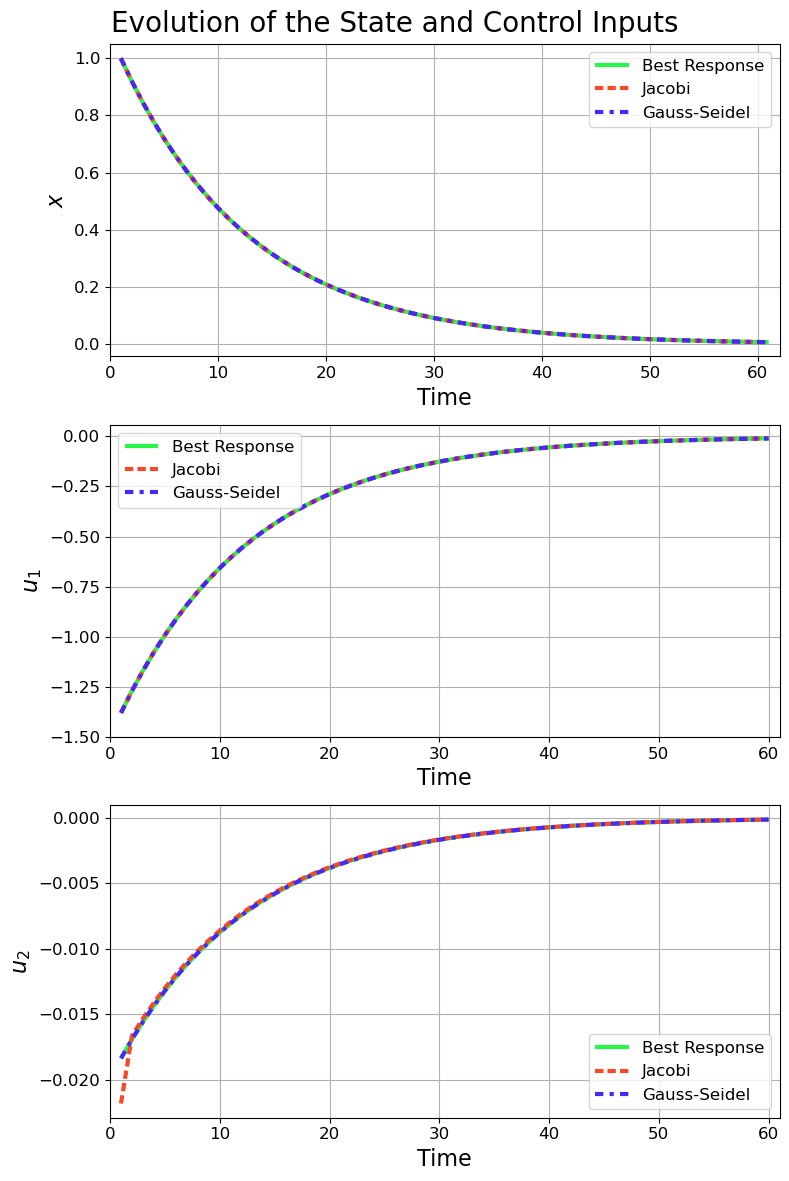

In [9]:
PyPlot.svg(true)

save_files = false #true - save all figures and data / false - do not save

t1 = Array(1:1:Kf+1)
t2 = Array(1:1:Kf)

figure(figsize=(8,12))
subplot(3,1,1)
grid()
plot(t1,x_br, linestyle = (0, ()), color="#27F549", linewidth=3)
plot(t1,x_jac, linestyle = (0, (2, 1)), color="#F54927", linewidth=3)
plot(t1,x_gs, linestyle = (0, (2, 1.5, 1, 1.5)), color="#4927F5", linewidth=3)
legend(["Best Response", "Jacobi", "Gauss-Seidel"],loc="best", fontsize=12)
ylabel("\$x\$", fontsize=16)
xlabel("Time", fontsize=16)
xlim(0,Kf+2)
yticks(Array(0:0.2:1), fontsize=12)
xticks(Array(0:10:Kf), fontsize=12)

subplot(3,1,2)
grid()
plot(t2,u_br[1,:], linestyle = (0, ()), color="#27F549", linewidth=3)
plot(t2,u_jac[1,:], linestyle = (0, (2, 1)), color="#F54927", linewidth=3)
plot(t2,u_gs[1,:], linestyle = (0, (2, 1.5, 1, 1.5)), color="#4927F5", linewidth=3)
legend(["Best Response", "Jacobi", "Gauss-Seidel"],loc="best", fontsize=12)
ylabel("\$u_1\$", fontsize=16)
xlabel("Time", fontsize=16)
xlim(0,Kf+1)
yticks(Array(-1.5:0.25:0), fontsize=12)
xticks(Array(0:10:Kf), fontsize=12)

subplot(3,1,3)
grid()
plot(t2,u_br[2,:], linestyle = (0, ()), color="#27F549", linewidth=3)
plot(t2,u_jac[2,:], linestyle = (0, (2, 1)), color="#F54927", linewidth=3)
plot(t2,u_gs[2,:], linestyle = (0, (2, 1.5, 1, 1.5)), color="#4927F5", linewidth=3)
legend(["Best Response", "Jacobi", "Gauss-Seidel"],loc="best", fontsize=12)
ylabel("\$u_2\$", fontsize=16)
xlabel("Time", fontsize=16)
xlim(0,Kf+1)
yticks(Array(-0.02:0.005:0), fontsize=12)
xticks(Array(0:10:Kf), fontsize=12)

suptitle("Evolution of the State and Control Inputs",fontsize=20)
tight_layout() #avoid the overlap of subplots

if save_files
    savefig("scalar_ex_1.eps", bbox_inches="tight")
end

## Deviation from Best Response:

In [10]:
x_mean = abs(mean(x_br))
u1_mean = abs(mean(u_br[1,:]))
u2_mean = abs(mean(u_br[2,:]))

RMSE_state_jac = sqrt((1/(Kf+1))*sum((x_jac - x_br).^2))
RMSE_u1_jac = sqrt((1/Kf)*sum((u_jac[1,:] - u_br[1,:]).^2))
RMSE_u2_jac = sqrt((1/Kf)*sum((u_jac[2,:] - u_br[2,:]).^2))

CV_state_jac = RMSE_state_jac/x_mean
CV_u1_jac = RMSE_u1_jac/u1_mean
CV_u2_jac = RMSE_u2_jac/u2_mean

println("Jacobi Game:")
println("Deviation (State) = ", round(CV_state_jac, digits=8))
println("Deviation (Player 1) = ", round(CV_u1_jac, digits=8))
println("Deviation (Player 2) = ", round(CV_u2_jac, digits=8), "\n")

RMSE_state_gs = sqrt((1/(Kf+1))*sum((x_gs - x_br).^2))
RMSE_u1_gs = sqrt((1/Kf)*sum((u_gs[1,:] - u_br[1,:]).^2))
RMSE_u2_gs = sqrt((1/Kf)*sum((u_gs[2,:] - u_br[2,:]).^2))

CV_state_gs = RMSE_state_gs/x_mean
CV_u1_gs = RMSE_u1_gs/u1_mean
CV_u2_gs = RMSE_u2_gs/u2_mean

println("Gauss-Seidel Game:")
println("Deviation (State) = ", round(CV_state_gs, digits=8))
println("Deviation (Player 1) = ", round(CV_u1_gs, digits=8))
println("Deviation (Player 2) = ", round(CV_u2_gs, digits=8))

Jacobi Game:
Deviation (State) = 0.00031724
Deviation (Player 1) = 0.00064404
Deviation (Player 2) = 0.11809742

Gauss-Seidel Game:
Deviation (State) = 0.00015615
Deviation (Player 1) = 0.00052946
Deviation (Player 2) = 0.00016826
